# Spatiotemporal Graph Neural Network (GNN) Demonstration
This notebook provides a hands-on example of applying a Graph Neural Network (GNN) to spatiotemporal data using PyTorch Geometric.

**Contents:**
- Construction of a simple dynamic graph with node features changing over time.
- Implementation and training of a GCN (Graph Convolutional Network) model.
- Visualization of training loss and node predictions.

This workflow is useful for understanding how GNNs can be used to model and analyze data with both spatial and temporal dependencies, such as traffic networks, sensor grids, or climate data.

# Spatiotemporal Graph Neural Network Example
This demonstrates a simple GNN over a dynamic graph using PyTorch Geometric.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# Create toy dynamic graph (fixed edges, varying features)
edge_index = torch.tensor([[0,1,1,2],
                           [1,0,2,1]], dtype=torch.long)

T = 20
features = []
labels = []
for t in range(T):
    x = torch.randn(3, 4) + t*0.1  # 3 nodes, 4 features
    y = torch.tensor([t%2, (t+1)%2, t%2], dtype=torch.long)
    features.append(x)
    labels.append(y)

class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

model = GCN(4, 8, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(30):
    loss_epoch = 0
    for t in range(T):
        x, y = features[t], labels[t]
        out = model(x, edge_index)
        loss = loss_fn(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_epoch += loss.item()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss {loss_epoch:.4f}")

Epoch 0, Loss 14.3779
Epoch 10, Loss 13.6697
Epoch 20, Loss 13.6070
Epoch 20, Loss 13.6070


## Visualizing GNN Outputs
Let's visualize the node predictions and training loss over time.

Epoch 0, Loss 13.5575
Epoch 10, Loss 13.5283
Epoch 20, Loss 13.5137


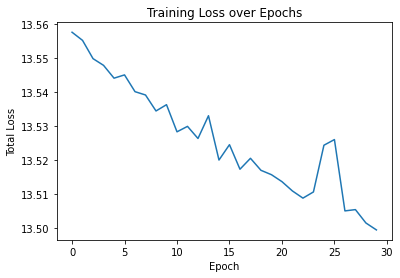

In [3]:
import matplotlib.pyplot as plt
loss_history = []
for epoch in range(30):
    loss_epoch = 0
    for t in range(T):
        x, y = features[t], labels[t]
        out = model(x, edge_index)
        loss = loss_fn(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_epoch += loss.item()
    loss_history.append(loss_epoch)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss {loss_epoch:.4f}")
plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Training Loss over Epochs')
plt.show()

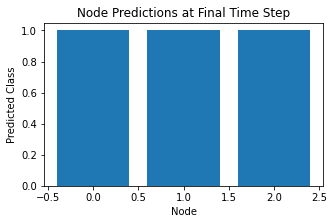

In [4]:
# Visualize node predictions for the last time step
x_last = features[-1]
out_last = model(x_last, edge_index)
pred_last = out_last.argmax(dim=1).numpy()
plt.figure(figsize=(5,3))
plt.bar(range(len(pred_last)), pred_last)
plt.xlabel('Node')
plt.ylabel('Predicted Class')
plt.title('Node Predictions at Final Time Step')
plt.show()